# **AI4DRM**: **Introdution to Aurora**

----
**Author**: **Siddik Barbhuiya**

**Email:**: siddikbarbhuiya@gmail.com

**Website**:https://barbhuiya12.github.io/




---


## **What is Aurora?**

Aurora is a machine learning model that can predict atmospheric variables, such as temperature. It is a foundation model, which means that it was first generally trained on a lot of data, and then can adapted to specialised atmospheric forecasting tasks with relatively little data..



## **What makes Aurora a foundation model?**


Aurora is considered a foundation model because it is trained in two main phases. First, in the “pre-training” phase, Aurora learns general-purpose representations of weather and climate by training on a vast and diverse set of data, including analysis, re-analysis, and forecast simulations. Then, in the “fine-tuning” phase, Aurora adapts its knowledge to excel at specific tasks like 10-day global weather forecasting or 5-day air pollution prediction, using smaller sets of high-quality data. This training approach allows Aurora to capture intricate patterns and tackle prediction tasks even when task-specific training data is limited.

### **Paper**


Bodnar, C., Bruinsma, W.P., Lucic, A. et al. A foundation model for the Earth system. Nature 641, 1180–1187 (2025). https://doi.org/10.1038/s41586-025-09005-y

## **Installation**



For the latest official release, install the pip package:

```bash
pip install microsoft-aurora
```
Or install from conda-forge with conda / mamba:

```bash
mamba install microsoft-aurora -c conda-forge
```
You can also install directly from GitHub:

```bash
git clone https://github.com/microsoft/aurora.git
cd aurora
```
Then create a new virtual environment and install the requirements:

```bash
virtualenv venv -p python3.10
source venv/bin/activate
make install
```

In [1]:
pip install microsoft-aurora

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.0/429.0 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 132.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.3/213.3 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.2 MB/s eta 0:00:00


## **Predictions for ERA5**


In this example, we will download ERA5 data for 1 Jan 2024 at 0.25 degrees resolution and run Aurora on this data. The fine-tuned version of Aurora specifically only works with IFS HRES T0, so we use the non-fine-tuned version of Aurora in this example.

Running this notebook requires additional Python packages. You can install these as follows:

In [2]:
pip install cdsapi matplotlib

## Downloading the Data
To begin with, register an account with the [Climate Data](https://cds.climate.copernicus.eu/) Store and create $HOME/.cdsapirc with the following content:

In [3]:
import os

cdsapi_config = """url: https://cds.climate.copernicus.eu/api
key: 63122f64-8b26-45af-a743-86abb5cbf82d"""

home_dir = os.path.expanduser("~")
config_file_path = os.path.join(home_dir, ".cdsapirc")

with open(config_file_path, "w") as f:
    f.write(cdsapi_config)

print(f"CDS API configuration saved to {config_file_path}")

CDS API configuration saved to /root/.cdsapirc


You can find your API key on your account page.

In order to be able to download ERA5 data, you need to accept the terms of use in the [dataset page](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=download).

We now download the ERA5 data.

In [4]:
from pathlib import Path

import cdsapi

# Data will be downloaded here.
download_path = Path("/era5")

c = cdsapi.Client()

download_path = download_path.expanduser()
download_path.mkdir(parents=True, exist_ok=True)

# Download the static variables.
if not (download_path / "static.nc").exists():
    c.retrieve(
        "reanalysis-era5-single-levels",
        {
            "product_type": "reanalysis",
            "variable": [
                "geopotential",
                "land_sea_mask",
                "soil_type",
            ],
            "year": "2024",
            "month": "01",
            "day": "01",
            "time": "00:00",
            "format": "netcdf",
        },
        str(download_path / "static.nc"),
    )
print("Static variables downloaded!")

# Download the surface-level variables.
if not (download_path / "2024-01-01-surface-level.nc").exists():
    c.retrieve(
        "reanalysis-era5-single-levels",
        {
            "product_type": "reanalysis",
            "variable": [
                "2m_temperature",
                "10m_u_component_of_wind",
                "10m_v_component_of_wind",
                "mean_sea_level_pressure",
            ],
            "year": "2024",
            "month": "01",
            "day": "01",
            "time": ["00:00", "06:00", "12:00", "18:00"],
            "format": "netcdf",
        },
        str(download_path / "2024-01-01-surface-level.nc"),
    )
print("Surface-level variables downloaded!")

# Download the atmospheric variables.
if not (download_path / "2024-01-01-atmospheric.nc").exists():
    c.retrieve(
        "reanalysis-era5-pressure-levels",
        {
            "product_type": "reanalysis",
            "variable": [
                "temperature",
                "u_component_of_wind",
                "v_component_of_wind",
                "specific_humidity",
                "geopotential",
            ],
            "pressure_level": [
                "50",
                "100",
                "150",
                "200",
                "250",
                "300",
                "400",
                "500",
                "600",
                "700",
                "850",
                "925",
                "1000",
            ],
            "year": "2024",
            "month": "01",
            "day": "01",
            "time": ["00:00", "06:00", "12:00", "18:00"],
            "format": "netcdf",
        },
        str(download_path / "2024-01-01-atmospheric.nc"),
    )
print("Atmospheric variables downloaded!")

2025-11-27 07:54:40,808 INFO Request ID is 689e02fc-d99e-4e01-9488-a1a9ef78e0cd
INFO:ecmwf.datastores.legacy_client:Request ID is 689e02fc-d99e-4e01-9488-a1a9ef78e0cd
2025-11-27 07:54:40,992 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-11-27 07:54:49,856 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-11-27 07:54:55,090 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


702afbbf455eda3d2fdb78d5d5d1a637.nc:   0%|          | 0.00/3.34M [00:00<?, ?B/s]

Static variables downloaded!


2025-11-27 07:54:58,739 INFO Request ID is d8d170f1-b4b9-4346-9e36-4065579d1661
INFO:ecmwf.datastores.legacy_client:Request ID is d8d170f1-b4b9-4346-9e36-4065579d1661
2025-11-27 07:54:58,996 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-11-27 07:55:07,836 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-11-27 07:55:13,082 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


286379a7629eb689559e44e25d7d5619.nc:   0%|          | 0.00/26.4M [00:00<?, ?B/s]

Surface-level variables downloaded!


2025-11-27 07:55:17,131 INFO Request ID is 87e5a523-bbfe-4e47-b7cc-dd75798a8b12
INFO:ecmwf.datastores.legacy_client:Request ID is 87e5a523-bbfe-4e47-b7cc-dd75798a8b12
2025-11-27 07:55:17,303 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-11-27 07:55:32,100 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


8b75d6331ff29d35544637e1410c42c2.nc:   0%|          | 0.00/419M [00:00<?, ?B/s]

Atmospheric variables downloaded!


## **Preparing a Batch**

We convert the downloaded data to an aurora.Batch, which is what the model requires.

In [5]:
import torch
import xarray as xr

from aurora import Batch, Metadata

static_vars_ds = xr.open_dataset(download_path / "static.nc", engine="netcdf4")
surf_vars_ds = xr.open_dataset(download_path / "2024-01-01-surface-level.nc", engine="netcdf4")
atmos_vars_ds = xr.open_dataset(download_path / "2024-01-01-atmospheric.nc", engine="netcdf4")

batch = Batch(
    surf_vars={
        # First select the first two time points: 00:00 and 06:00. Afterwards, `[None]`
        # inserts a batch dimension of size one.
        "2t": torch.from_numpy(surf_vars_ds["t2m"].values[:2][None]),
        "10u": torch.from_numpy(surf_vars_ds["u10"].values[:2][None]),
        "10v": torch.from_numpy(surf_vars_ds["v10"].values[:2][None]),
        "msl": torch.from_numpy(surf_vars_ds["msl"].values[:2][None]),
    },
    static_vars={
        # The static variables are constant, so we just get them for the first time.
        "z": torch.from_numpy(static_vars_ds["z"].values[0]),
        "slt": torch.from_numpy(static_vars_ds["slt"].values[0]),
        "lsm": torch.from_numpy(static_vars_ds["lsm"].values[0]),
    },
    atmos_vars={
        "t": torch.from_numpy(atmos_vars_ds["t"].values[:2][None]),
        "u": torch.from_numpy(atmos_vars_ds["u"].values[:2][None]),
        "v": torch.from_numpy(atmos_vars_ds["v"].values[:2][None]),
        "q": torch.from_numpy(atmos_vars_ds["q"].values[:2][None]),
        "z": torch.from_numpy(atmos_vars_ds["z"].values[:2][None]),
    },
    metadata=Metadata(
        lat=torch.from_numpy(surf_vars_ds.latitude.values),
        lon=torch.from_numpy(surf_vars_ds.longitude.values),
        # Converting to `datetime64[s]` ensures that the output of `tolist()` gives
        # `datetime.datetime`s. Note that this needs to be a tuple of length one:
        # one value for every batch element. Select element 1, corresponding to time
        # 06:00.
        time=(surf_vars_ds.valid_time.values.astype("datetime64[s]").tolist()[1],),
        atmos_levels=tuple(int(level) for level in atmos_vars_ds.pressure_level.values),
    ),
)

## **Loading and Running the Model**


Finally, we are ready to load and run the model and visualise the predictions. We perform a roll-out for two steps, which produces predictions for hours 12:00 and 18:00.

In [6]:
# Set to `False` to run locally and to `True` to run on Foundry.
run_on_foundry = False

In [8]:
if not run_on_foundry:
    from aurora import Aurora, rollout

    model = Aurora(use_lora=False)  # The pretrained version does not use LoRA.
    model.load_checkpoint("microsoft/aurora", "aurora-0.25-pretrained.ckpt")

    model.eval()
    model = model.to("cpu")  # Changed from "cuda" to "cpu"

    with torch.inference_mode():
        preds = [pred.to("cpu") for pred in rollout(model, batch, steps=2)]

    # No need to move model back to cpu if it's already on cpu

In [9]:
if run_on_foundry:
    import logging
    import os
    import warnings

    from aurora.foundry import BlobStorageChannel, FoundryClient, submit

    # In this demo, we silence all warnings.
    warnings.filterwarnings("ignore")

    # But we do want to show what's happening under the hood!
    logging.basicConfig(level=logging.WARNING, format="%(asctime)s [%(levelname)s] %(message)s")
    logging.getLogger("aurora").setLevel(logging.INFO)

    foundry_client = FoundryClient(
        endpoint=os.environ["FOUNDRY_ENDPOINT"],
        token=os.environ["FOUNDRY_TOKEN"],
    )
    channel = BlobStorageChannel(os.environ["BLOB_URL_WITH_SAS"])

    predictions = list(
        submit(
            batch,
            model_name="aurora-0.25-pretrained",
            num_steps=2,
            foundry_client=foundry_client,
            channel=channel,
        )
    )

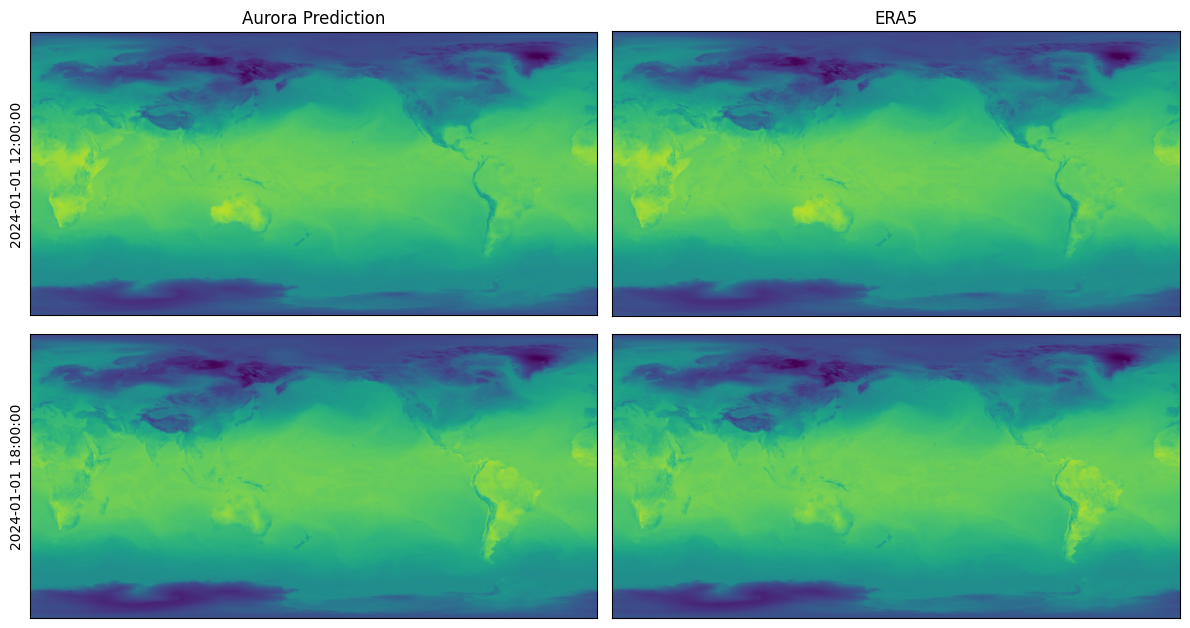

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 6.5))

for i in range(ax.shape[0]):
    pred = preds[i]

    ax[i, 0].imshow(pred.surf_vars["2t"][0, 0].numpy() - 273.15, vmin=-50, vmax=50)
    ax[i, 0].set_ylabel(str(pred.metadata.time[0]))
    if i == 0:
        ax[i, 0].set_title("Aurora Prediction")
    ax[i, 0].set_xticks([])
    ax[i, 0].set_yticks([])

    ax[i, 1].imshow(surf_vars_ds["t2m"][2 + i].values - 273.15, vmin=-50, vmax=50)
    if i == 0:
        ax[i, 1].set_title("ERA5")
    ax[i, 1].set_xticks([])
    ax[i, 1].set_yticks([])

plt.tight_layout()